In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
dados = pd.read_csv("empreiteira.csv")
dados.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
dados.head(3)

,Projeto_ID,Data_Inicial,Data_Conclusao,Orcamento,Categoria,Recurso_ID,Nome,Funcao,Custo_Hora,Data_Alocacao,Horas_Alocadas,Mes_Alocacao,Ano_Alocacao
0,1,2022-01-01,2022-06-13,228049.0,Infraestrutura,1,Davi Lucca Gomes,Pedreiro,88.66,2022-03-30,94.0,3,2022
1,1,2022-01-01,2022-06-13,228049.0,Infraestrutura,2,Luiza Farias,Pedreiro,79.33,2022-05-26,12.0,5,2022
2,1,2022-01-01,2022-06-13,228049.0,Infraestrutura,3,Sr. João Gabriel Novaes,Encanador,99.61,2022-04-14,98.0,4,2022


# 1. Identifique os períodos de maior atividade da empreiteira ao longo do tempo.

In [9]:
dados["Data_Alocacao"] = pd.to_datetime(dados['Data_Alocacao'])

In [10]:
dados['Mes_Alocado'] = dados['Data_Alocacao'].dt.month
dados['Ano_Alocado'] = dados['Data_Alocacao'].dt.year

In [ ]:
dados.head(3)

In [13]:
mes_horas = dados.groupby('Mes_Alocado')['Horas_Alocadas'].sum()

Text(0.5, 1.0, 'Horas alocadas por mês')

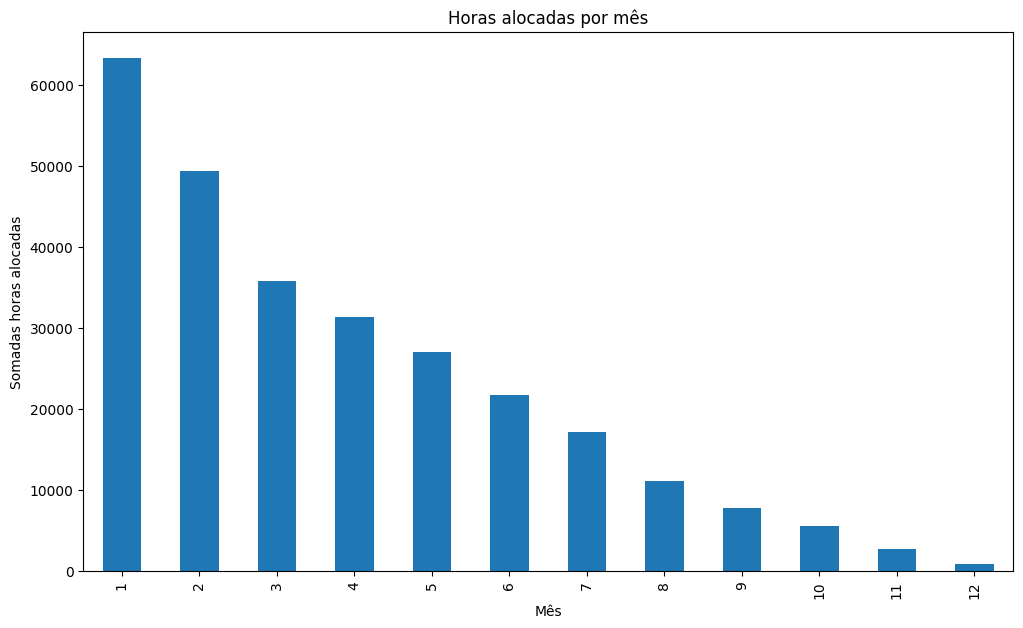

In [15]:
mes_horas.plot(kind='bar',figsize=(12,7))
plt.xlabel('Mês')
plt.ylabel('Somadas horas alocadas')
plt.title('Horas alocadas por mês')

# Analise a duração média dos projetos e sua distribuição.

In [21]:
dados['Data_Inicial'] = pd.to_datetime(dados['Data_Inicial'])
dados['Data_Conclusao'] = pd.to_datetime(dados['Data_Conclusao'])

In [22]:
dados.drop(columns=["DataConclusao"],inplace=True)

In [23]:
dados.dtypes

Projeto_ID                 int64
Data_Inicial      datetime64[ns]
Data_Conclusao    datetime64[ns]
Orcamento                float64
Categoria                 object
Recurso_ID                 int64
Nome                      object
Funcao                    object
Custo_Hora               float64
Data_Alocacao     datetime64[ns]
Horas_Alocadas           float64
Mes_Alocacao               int64
Ano_Alocacao               int64
Mes_Alocado                int64
Ano_Alocado                int64
dtype: object

In [24]:
dados['Duracao'] = dados["Data_Conclusao"] - dados["Data_Inicial"]

In [25]:
dados.head()

,Projeto_ID,Data_Inicial,Data_Conclusao,Orcamento,Categoria,Recurso_ID,Nome,Funcao,Custo_Hora,Data_Alocacao,Horas_Alocadas,Mes_Alocacao,Ano_Alocacao,Mes_Alocado,Ano_Alocado,Duracao
0,1,2022-01-01,2022-06-13,228049.0,Infraestrutura,1,Davi Lucca Gomes,Pedreiro,88.66,2022-03-30,94.0,3,2022,3,2022,163 days
1,1,2022-01-01,2022-06-13,228049.0,Infraestrutura,2,Luiza Farias,Pedreiro,79.33,2022-05-26,12.0,5,2022,5,2022,163 days
2,1,2022-01-01,2022-06-13,228049.0,Infraestrutura,3,Sr. João Gabriel Novaes,Encanador,99.61,2022-04-14,98.0,4,2022,4,2022,163 days
3,1,2022-01-01,2022-06-13,228049.0,Infraestrutura,4,Sr. Kevin Farias,Encanador,93.42,2022-03-25,29.0,3,2022,3,2022,163 days
4,1,2022-01-01,2022-06-13,228049.0,Infraestrutura,5,Maria Fernanda Caldeira,Arquiteto,62.41,2022-06-06,31.0,6,2022,6,2022,163 days


In [31]:
dados['Duracao_Media'] = dados['Duracao'].dt.days

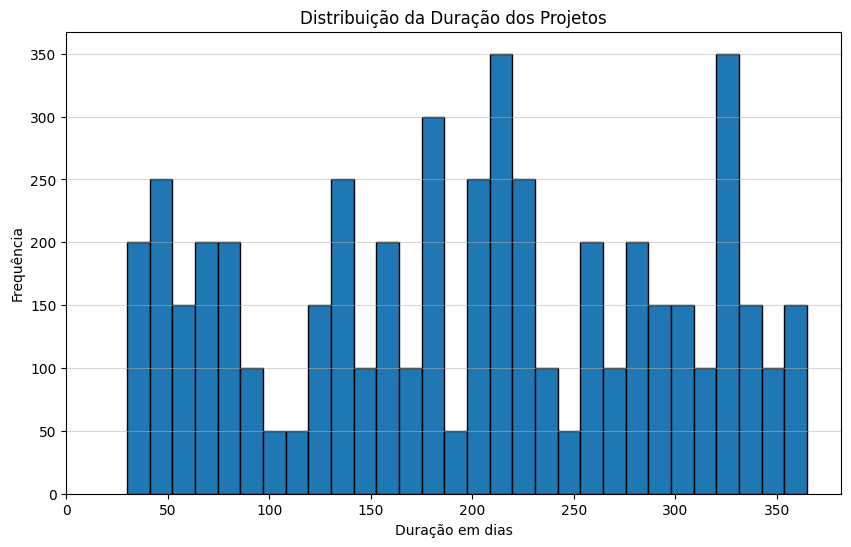

In [36]:
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.hist(dados["Duracao_Media"], bins=30, edgecolor='black')  # Adiciona uma borda preta ao redor das barras
plt.xlabel('Duração em dias')
plt.ylabel('Frequência')
plt.title('Distribuição da Duração dos Projetos')

# Adiciona uma grade ao gráfico
plt.grid(axis='y', alpha=0.5)

# Adiciona rótulos no eixo x com intervalos regulares
plt.xticks(range(0, max(dados["Duracao_Media"]), 50))

plt.show()